In [115]:
!pip install pandas-datareader --upgrade
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm

In [139]:
df = pd.read_excel('Mulvaney Capital.xlsx')
df = df.rename(columns={'Date': 'Year'})

df


,Year,Mulvaney Capital Returns,Chesepeake Captial Returns,SP500 Returns,BRK-B Returns
0,2022,0.8954,0.1935,-0.187106,0.057745
1,2021,0.3293,0.1197,0.246839,0.266223
2,2020,0.1853,0.0585,0.210538,0.084421
3,2019,-0.2128,-0.0402,0.261588,0.115060
4,2018,-0.0433,-0.0769,-0.049921,0.055015
5,2017,0.0157,0.0451,0.179757,0.201797
6,2016,-0.0182,-0.0392,0.099646,0.221634
7,2015,-0.0077,0.0197,0.004678,-0.113655
8,2014,0.6736,0.1377,0.114345,0.245365
9,2013,0.4312,0.2538,0.265531,0.290103


In [140]:
df.columns

Index(['Year', 'Mulvaney Capital Returns', 'Chesepeake Captial Returns',
       'SP500 Returns', 'BRK-B Returns'],
      dtype='object')

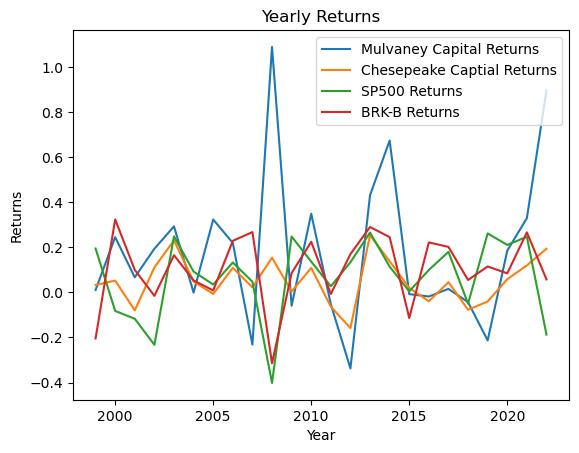

In [141]:
df.set_index('Year', inplace = True)
df.plot(kind='line')
plt.title('Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')

plt.show()

In [142]:
df = df.sort_index(ascending=True)
df

,Mulvaney Capital Returns,Chesepeake Captial Returns,SP500 Returns,BRK-B Returns
Year,,,,
1999,0.0109,0.0330,0.194669,-0.204341
2000,0.2451,0.0524,-0.082290,0.323666
2001,0.0669,-0.0799,-0.116940,0.099716
2002,0.1937,0.1108,-0.232379,-0.015218
2003,0.2928,0.2307,0.248721,0.165081
2004,-0.0010,0.0484,0.092262,0.052941
2005,0.3234,-0.0069,0.034836,0.008769
2006,0.2194,0.1088,0.132697,0.228757
2007,-0.2314,0.0226,0.047403,0.267395


In [143]:
column_dfs = {}

for i in range(0, len(df.columns)):
    column_name = df.columns[i]
    
    column_df = pd.DataFrame({column_name: df.iloc[:, i]})
    
    column_dfs[column_name] = column_df

for column, column_df in column_dfs.items():
    print(column_df)
    print()


      Mulvaney Capital Returns
Year                          
1999                    0.0109
2000                    0.2451
2001                    0.0669
2002                    0.1937
2003                    0.2928
2004                   -0.0010
2005                    0.3234
2006                    0.2194
2007                   -0.2314
2008                    1.0887
2009                   -0.0590
2010                    0.3490
2011                   -0.0526
2012                   -0.3372
2013                    0.4312
2014                    0.6736
2015                   -0.0077
2016                   -0.0182
2017                    0.0157
2018                   -0.0433
2019                   -0.2128
2020                    0.1853
2021                    0.3293
2022                    0.8954

      Chesepeake Captial Returns
Year                            
1999                      0.0330
2000                      0.0524
2001                     -0.0799
2002                      0.

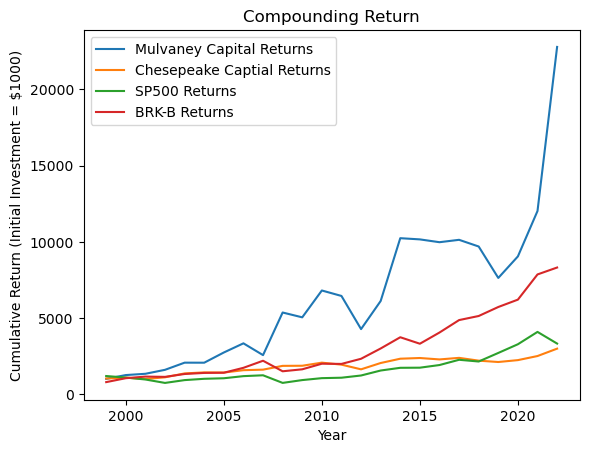

In [144]:
stock_cumulative_returns = pd.concat([(1 + df[column]).cumprod() * 1000 for column, df in column_dfs.items()], axis=1)

plt.plot(stock_cumulative_returns)
plt.legend(stock_cumulative_returns.columns)
plt.title('Compounding Return')
plt.xlabel('Year')
plt.ylabel('Cumulative Return (Initial Investment = $1000)')
plt.show()

# Trend Portfolio with Stocks Weighted
## Correlation 

In [110]:
df

,Mulvaney Capital Returns,Chesepeake Captial Returns,SP500 Returns,BRK-B Returns
Year,,,,
1999,0.0109,0.0330,0.195260,-0.222600
2000,0.2451,0.0524,-0.101392,0.289863
2001,0.0669,-0.0799,-0.130427,0.064054
2002,0.1937,0.1108,-0.233660,-0.026908
2003,0.2928,0.2307,0.263804,0.163223
2004,-0.0010,0.0484,0.089935,0.042984
2005,0.3234,-0.0069,0.030010,-0.000170
2006,0.2194,0.1088,0.136194,0.253333
2007,-0.2314,0.0226,0.035493,0.287656


In [130]:
market = ['^GSPC' ]
data = yf.download(market, start=start_date, end=end_date)['Adj Close']

stock_returns_table = data.pct_change().resample('Y').sum()
stock_returns_table.columns = [ticker + ' Year Returns' for ticker in market]
print(stock_returns_table)

[*********************100%***********************]  1 of 1 completed
Date
1998-12-31    0.046470
1999-12-31    0.194669
2000-12-31   -0.082290
2001-12-31   -0.116940
2002-12-31   -0.232379
2003-12-31    0.248721
2004-12-31    0.092262
2005-12-31    0.034836
2006-12-31    0.132697
2007-12-31    0.047403
2008-12-31   -0.401459
2009-12-31    0.247835
2010-12-31    0.136564
2011-12-31    0.027066
2012-12-31    0.133880
2013-12-31    0.265531
2014-12-31    0.114345
2015-12-31    0.004678
2016-12-31    0.099646
2017-12-31    0.179757
2018-12-31   -0.049921
2019-12-31    0.261588
2020-12-31    0.210538
2021-12-31    0.246839
2022-12-31   -0.187106
2023-12-31    0.078700
Freq: A-DEC, Name: Adj Close, dtype: float64


In [138]:
stocks = ['XOM' ]
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

stock_table = data.pct_change().resample('Y').sum()
stock_table.columns = [ticker + ' Year Returns' for ticker in stocks]
print(stock_table)

[*********************100%***********************]  1 of 1 completed
Date
1999-12-31    0.162093
2000-12-31    0.147146
2001-12-31   -0.049427
2002-12-31   -0.041596
2003-12-31    0.203073
2004-12-31    0.259499
2005-12-31    0.138378
2006-12-31    0.348367
2007-12-31    0.245797
2008-12-31   -0.008829
2009-12-31   -0.100946
2010-12-31    0.112599
2011-12-31    0.203310
2012-12-31    0.056836
2013-12-31    0.191829
2014-12-31   -0.048835
2015-12-31   -0.111644
2016-12-31    0.199559
2017-12-31   -0.032607
2018-12-31   -0.139701
2019-12-31    0.086602
2020-12-31   -0.309769
2021-12-31    0.498275
2022-12-31    0.690155
2023-12-31    0.007905
Freq: A-DEC, Name: Adj Close, dtype: float64


In [134]:
correlation = stock_table.corr(stock_returns_table)
print("XOM Correlation to the Market: ",correlation)


XOM Correlation to the Market:  0.01717836497072175


In [158]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'BRK-B', 'GPK', 'XOM', '^GSPC']
market = '^GSPC'

start_date = '1999-01-01'
end_date = '2023-12-31'

data = yf.download(stocks + [market], start=start_date, end=end_date)['Adj Close']

returns_table = data.pct_change().resample('Y').sum()

stock_returns_table = returns_table[stocks]

market_returns = returns_table[market]

correlation_matrix = stock_returns_table.corrwith(market_returns)

print(correlation_matrix)


[*********************100%***********************]  7 of 7 completed
AAPL     0.638795
AMZN     0.426991
MSFT     0.668903
BRK-B    0.487351
GPK      0.207603
XOM      0.016284
^GSPC    1.000000
dtype: float64


In [159]:
stock_returns_table

,AAPL,AMZN,MSFT,BRK-B,GPK,XOM,^GSPC
Date,,,,,,,
1999-12-31,1.086782,0.759411,0.576402,-0.204341,0.051615,0.162092,0.195589
2000-12-31,-0.778918,-1.073069,-0.829234,0.323666,-0.934933,0.147146,-0.082290
2001-12-31,0.577605,0.254382,0.518759,0.099716,1.785261,-0.049427,-0.116940
2002-12-31,-0.305516,0.818570,-0.156824,-0.015218,0.350018,-0.041595,-0.232379
2003-12-31,0.467934,1.122446,0.108075,0.165081,-0.201097,0.203072,0.248721
2004-12-31,1.184971,-0.081928,0.101911,0.052941,0.703703,0.259499,0.092262
2005-12-31,0.879475,0.126279,0.000831,0.008769,-0.974235,0.138378,0.034836
2006-12-31,0.238324,-0.095239,0.168840,0.228757,0.794065,0.348367,0.132697
2007-12-31,0.919658,0.980323,0.215126,0.267395,0.012047,0.245797,0.047403


In [169]:
port_return_data = pd.read_excel('Portfolio Return Data Yearly.xlsx')
port_return_data

,Date,Mulvaney Capital Returns,Chesepeake Captial Returns,AAPL,AMZN,MSFT,BRK-B,GPK,XOM,^GSPC
0,1999,0.0109,0.0330,1.086783,0.759411,0.576403,-0.204341,0.051615,0.162092,0.195589
1,2000,0.2451,0.0524,-0.778918,-1.073069,-0.829234,0.323666,-0.934933,0.147146,-0.082290
2,2001,0.0669,-0.0799,0.577605,0.254382,0.518759,0.099716,1.785261,-0.049428,-0.116940
3,2002,0.1937,0.1108,-0.305516,0.818570,-0.156824,-0.015218,0.350018,-0.041595,-0.232379
4,2003,0.2928,0.2307,0.467934,1.122446,0.108075,0.165081,-0.201098,0.203072,0.248721
5,2004,-0.0010,0.0484,1.184971,-0.081928,0.101910,0.052941,0.703703,0.259499,0.092262
6,2005,0.3234,-0.0069,0.879475,0.126279,0.000831,0.008769,-0.974235,0.138379,0.034836
7,2006,0.2194,0.1088,0.238324,-0.095239,0.168840,0.228757,0.794065,0.348368,0.132697
8,2007,-0.2314,0.0226,0.919658,0.980323,0.215126,0.267395,0.012046,0.245797,0.047403
9,2008,1.0887,0.1539,-0.669397,-0.375576,-0.470191,-0.314423,-0.304543,-0.008829,-0.401459


In [172]:
port_correlation = port_return_data.corr()
port_correlation = port_return_data.drop('Date', axis=1).corr()

port_correlation

,Mulvaney Capital Returns,Chesepeake Captial Returns,AAPL,AMZN,MSFT,BRK-B,GPK,XOM,^GSPC
Mulvaney Capital Returns,1.000000,0.735449,-0.495446,-0.486031,-0.445963,-0.195599,-0.241609,0.251966,-0.456293
Chesepeake Captial Returns,0.735449,1.000000,-0.259850,-0.075484,-0.197366,0.100039,-0.152409,0.348296,-0.006215
AAPL,-0.495446,-0.259850,1.000000,0.521284,0.716716,0.046612,0.373008,-0.057244,0.639123
AMZN,-0.486031,-0.075484,0.521284,1.000000,0.633130,-0.105310,0.281813,-0.379998,0.427199
MSFT,-0.445963,-0.197366,0.716716,0.633130,1.000000,0.067495,0.560211,-0.226389,0.669961
BRK-B,-0.195599,0.100039,0.046612,-0.105310,0.067495,1.000000,0.089407,0.244610,0.489442
GPK,-0.241609,-0.152409,0.373008,0.281813,0.560211,0.089407,1.000000,-0.095737,0.208001
XOM,0.251966,0.348296,-0.057244,-0.379998,-0.226389,0.244610,-0.095737,1.000000,0.017725
^GSPC,-0.456293,-0.006215,0.639123,0.427199,0.669961,0.489442,0.208001,0.017725,1.000000


In [173]:
port_correlation['^GSPC']

Mulvaney Capital Returns     -0.456293
Chesepeake Captial Returns   -0.006215
AAPL                          0.639123
AMZN                          0.427199
MSFT                          0.669961
BRK-B                         0.489442
GPK                           0.208001
XOM                           0.017725
^GSPC                         1.000000
Name: ^GSPC, dtype: float64